In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Check for missing values
print("Missing values in dataset:")
print(X.isnull().sum())

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


Missing values in dataset:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


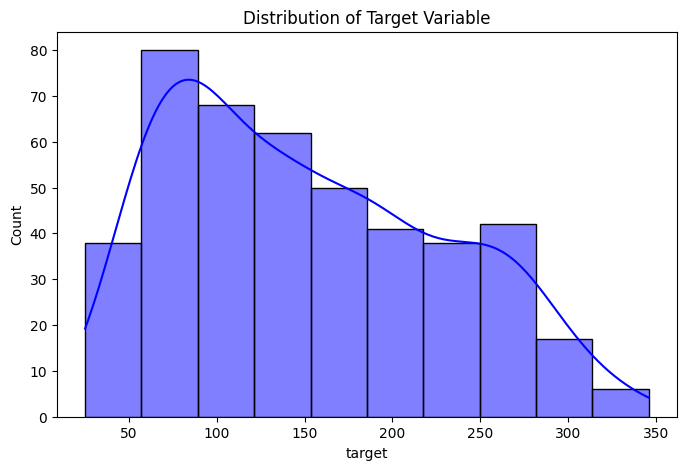

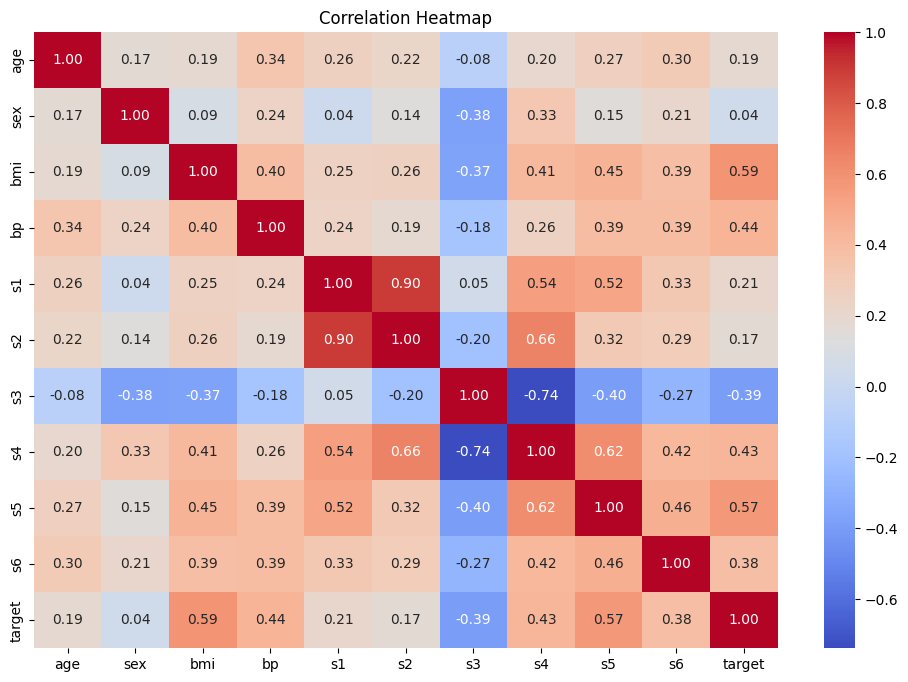

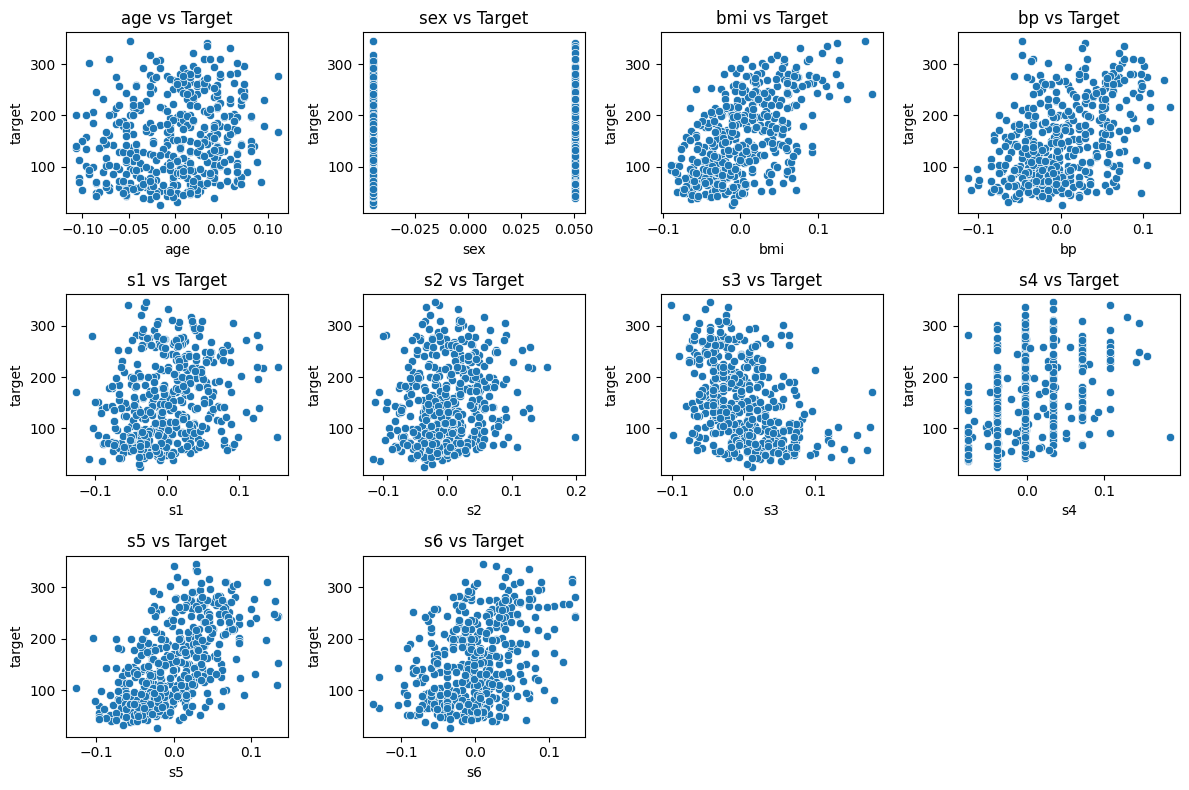

In [2]:
# Import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, color='blue')
plt.title("Distribution of Target Variable")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plot for feature-target relationships
plt.figure(figsize=(12, 8))
for i, col in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=X[col], y=y)
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()


In [3]:
# Import TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X.shape[1]),  # Input layer
    Dense(32, activation='relu'),                       # Hidden layer
    Dense(1)                                            # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print("Model summary:")
model.summary()


Model summary:


/Users/fyzl/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Import library for splitting data
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31967.5039 - mae: 159.1011 - val_loss: 22204.2266 - val_mae: 133.0820
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30300.0312 - mae: 155.7921 - val_loss: 21999.9336 - val_mae: 132.3732
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32578.9648 - mae: 161.3529 - val_loss: 21756.6992 - val_mae: 131.5375
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27822.7168 - mae: 147.8808 - val_loss: 21466.8965 - val_mae: 130.5394
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30671.6367 - mae: 155.9692 - val_loss: 21109.0957 - val_mae: 129.3101
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29118.3203 - mae: 151.5086 - val_loss: 20677.5625 - val_mae: 127.8277
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27574.3555 - mae: 145.6389 - val_loss: 20151.7832 - val_mae: 126.0168
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29242.5020 - mae: 151.4699 - val_loss: 19507.0684 - va

In [5]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mean Squared Error: 2906.35
R² Score: 0.45


In [6]:
# Experiment with adding layers, neurons, or changing activation functions
model_improved = Sequential([
    Dense(128, activation='relu', input_dim=X.shape[1]),  # Increased neurons
    Dense(64, activation='relu'),                        # Hidden layer
    Dense(32, activation='relu'),                        # Additional hidden layer
    Dense(1)                                             # Output layer
])

# Compile the improved model
model_improved.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_improved.summary()

# Train the improved model
history_improved = model_improved.fit(X_train, y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the improved model
y_pred_improved = model_improved.predict(X_test)
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print(f"Improved Model Mean Squared Error: {mse_improved:.2f}")
print(f"Improved Model R² Score: {r2_improved:.2f}")


/Users/fyzl/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31020.6641 - mae: 157.8729 - val_loss: 21597.3340 - val_mae: 131.0757
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28502.2559 - mae: 150.2595 - val_loss: 19529.7051 - val_mae: 123.7016
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26059.5020 - mae: 141.6394 - val_loss: 14769.2627 - val_mae: 104.8775
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18436.5273 - mae: 114.9838 - val_loss: 7522.7031 - val_mae: 66.6275
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7501.0757 - mae: 65.9999 - val_loss: 3810.0010 - val_mae: 46.7103
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5392.4937 - mae: 57.7049 - val_loss: 3453.0510 - val_mae: 44.4723
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4258.0127 - mae: 53.3341 - val_loss: 3312.3298 - val_mae: 42.4608
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4485.4600 - mae: 52.0740 - val_loss: 3135.9358 - val